# Методы анализа и обработки изображения

---

ЛР3 - Выделение границ

Студентка гр. РИМ-181226

Бабайлова Маргарита Леонидовна

In [158]:
from skimage.io import imread, imshow, imsave
from skimage.morphology import binary_erosion, binary_dilation, binary_opening, binary_closing, disk, rectangle
from skimage.color import rgb2gray, rgb2yuv, yuv2rgb
from skimage import data
from scipy.signal import convolve2d
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters

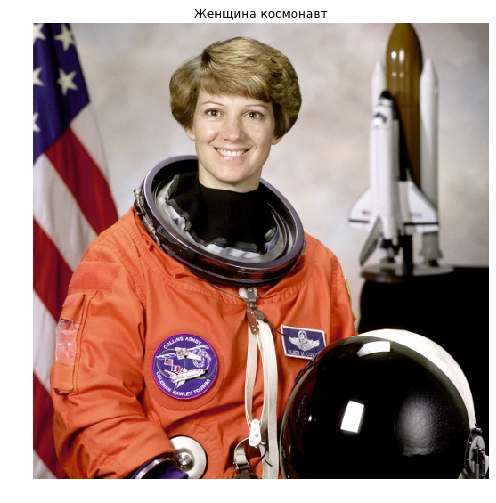

In [159]:
img = data.astronaut()
plt.figure(figsize=(7, 10))
plt.axis('off')
imshow(img)
plt.title('Женщина космонавт')
plt.show()

Выделение скачков яркости

Одним из простейших в применении является фильтр, предназначенный для выделения на исходном изображении (рис. 8.3) резких скачков яркости. Данный фильтр использует свертку с ядром размером 3x3 к яркости изображения. 

Стандартный фильтр для выделения скачков яркости (выделения границ, edge detection) использует разностную аппроксимацию первых производных к яркости исходного изображения и использует следующие матрицы в качестве ядра свертки:

\begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 1 \\ 0 & 0 & 0 \end{bmatrix} 

\begin{bmatrix} 0 & 1 & 0 \\ 0 & 0 & 0 \\ 0 & -1 & 0 \end{bmatrix} 

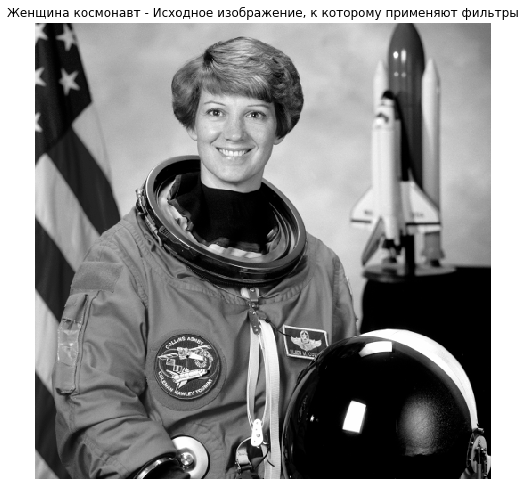

In [160]:
imgGray = rgb2gray(img)
plt.figure(figsize=(7, 10))
plt.axis('off')
imshow(imgGray)
plt.title('Женщина космонавт - Исходное изображение, к которому применяют фильтры')
plt.show()

In [161]:
kernel_Dx = np.array([[0, 0, 0], 
                     [-1, 0, 1], 
                     [0, 0, 0]])

kernel_Dy = np.array([[0, 1, 0], 
                     [0, 0, 0], 
                     [0, -1, 0]])

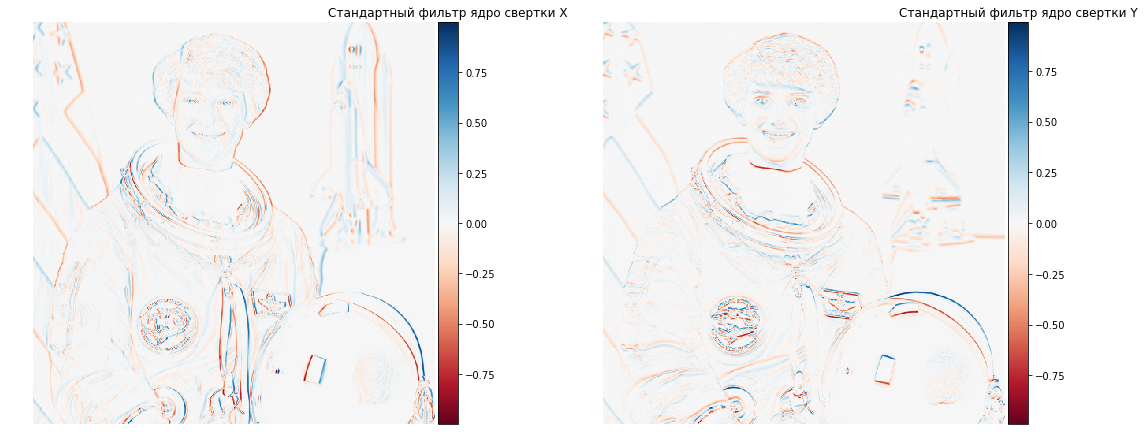

In [162]:
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(1, 2, 1)
plt.axis('off')
imshow(convolve2d(imgGray, kernel_Dx, mode = "valid"))
plt.title('Стандартный фильтр ядро свертки X')

fig.add_subplot(1, 2, 2)
plt.axis('off')
imshow(convolve2d(imgGray, kernel_Dy, mode = "valid"))
plt.title('Стандартный фильтр ядро свертки Y')
plt.show()

Фильтр Превитта

In [163]:
kernel_Px = np.array([[-1, 0, 1], 
                     [-1, 0, 1], 
                     [-1, 0, 1]])

kernel_Py = np.array([[1, 1, 1], 
                     [0, 0, 0], 
                     [-1, -1, -1]])

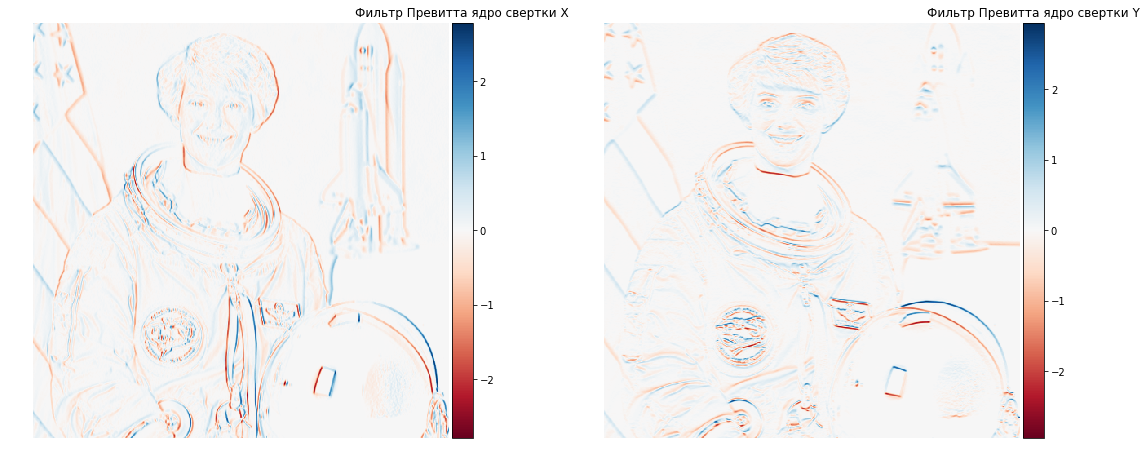

In [164]:
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(1, 2, 1)
plt.axis('off')
imshow(convolve2d(imgGray, kernel_Px, mode = "valid"))
plt.title('Фильтр Превитта ядро свертки X')

fig.add_subplot(1, 2, 2)
plt.axis('off')
imshow(convolve2d(imgGray, kernel_Py, mode = "valid"))
plt.title('Фильтр Превитта ядро свертки Y')
plt.show()

Фильтр Собеля

In [165]:
kernel_Sx = np.array([[-1, 0, 1], 
                     [-2, 0, 2], 
                     [-1, 0, 1]])

kernel_Sy = np.array([[1, 2, 1], 
                     [0, 0, 0], 
                     [-1, -2, -1]])

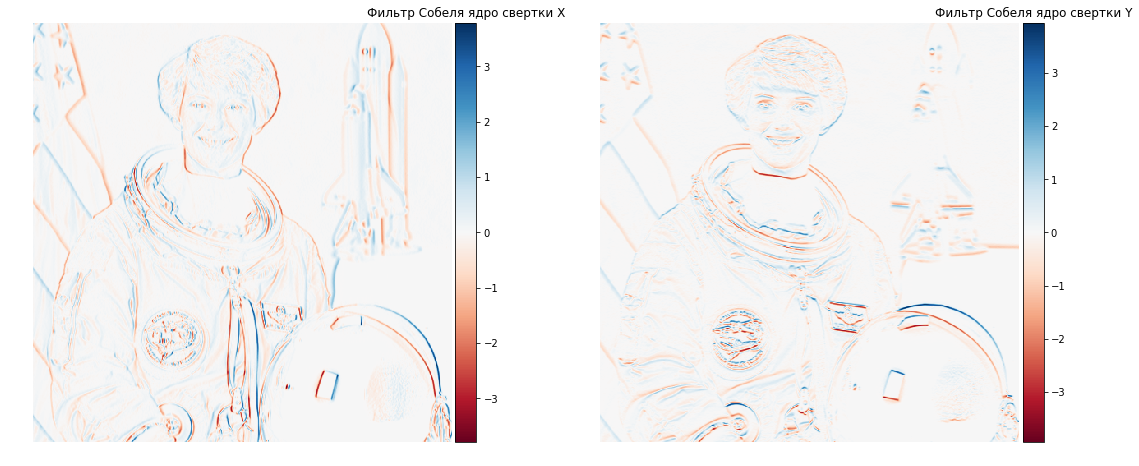

In [166]:
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(1, 2, 1)
plt.axis('off')
imshow(convolve2d(imgGray, kernel_Sx, mode = "valid"))
plt.title('Фильтр Собеля ядро свертки X')

fig.add_subplot(1, 2, 2)
plt.axis('off')
imshow(convolve2d(imgGray, kernel_Sy, mode = "valid"))
plt.title('Фильтр Собеля ядро свертки Y')
plt.show()

Вместо вычисления первой производной можно использовать разностный аналог лапласиана

Разностный аналог лапласиана

In [167]:
kernel_L1 = np.array([[0, 1, 0], 
                     [-1, 4, -1], 
                     [0, 1, 0]])

kernel_L2 = np.array([[-1, -1, -1], 
                     [-1, 8, -1], 
                     [-1, -1, -1]])

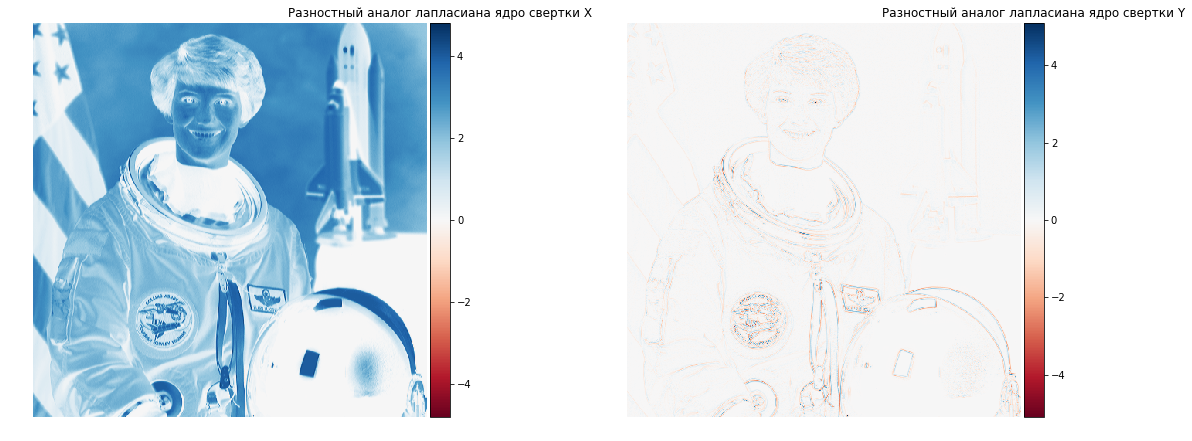

In [168]:
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(1, 2, 1)
plt.axis('off')
imshow(convolve2d(imgGray, kernel_L1, mode = "valid"))
plt.title('Разностный аналог лапласиана ядро свертки X')

fig.add_subplot(1, 2, 2)
plt.axis('off')
imshow(convolve2d(imgGray, kernel_L2, mode = "valid"))
plt.title('Разностный аналог лапласиана ядро свертки Y')
plt.show()

Еще одним интересным фильтром является фильтр тиснения. Данный фильтр использует следующее ядро:

\begin{bmatrix} 2 & 0 & 0 \\ 0 & -1 & 0 \\ 0 & 0 & 1 \end{bmatrix} 

In [169]:
kernel_E1 = np.array([[2, 0, 0], 
                     [0, -1, 0], 
                     [0, 0, 1]])

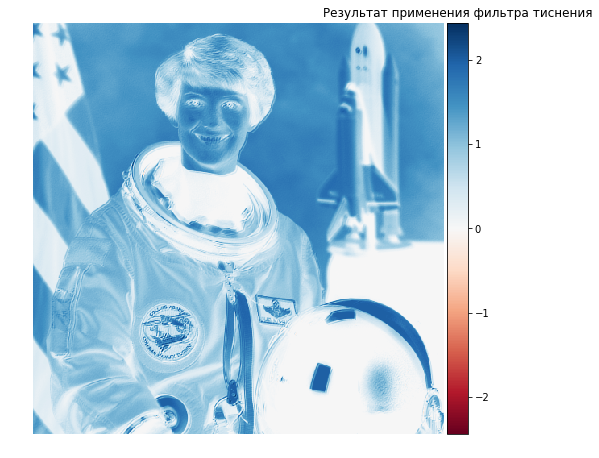

In [170]:
plt.figure(figsize=(7, 10))
plt.axis('off')
imshow(convolve2d(imgGray, kernel_E1, mode = "valid"))
plt.title('Результат применения фильтра тиснения')
plt.show()

Фильтр повышения контрастности - один из довольно простых фильтров, применяемых не к яркости изображения, а по отдельности к каждому из цветовых каналов.

In [171]:
def high_contrast(img):
    kernel_KK1 = np.array([[-1, -1, -1], 
                     [-1, 9, -1], 
                     [-1, -1, -1]])
    
    img = rgb2yuv(img)
    Y = img[:,:,0]
    U = img[:,:,1]
    V = img[:,:,2]
    
    Y = convolve2d(Y, kernel_KK1, mode = "same")
    U = convolve2d(U, kernel_KK1, mode = "same")
    V = convolve2d(V, kernel_KK1, mode = "same")
    img = np.dstack((Y,U,V))
    img = yuv2rgb(img)
    img = np.clip(img, 0, 1)
    return img

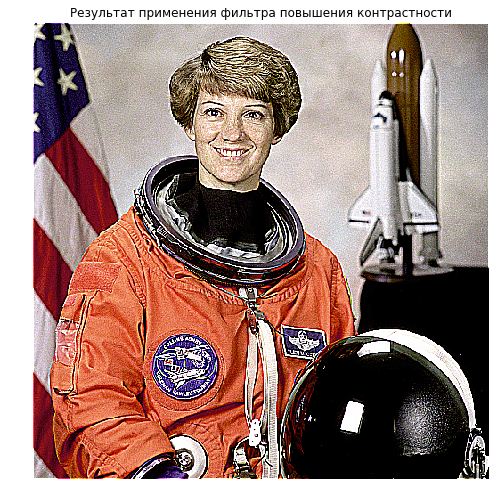

In [172]:
plt.figure(figsize=(7, 10))
plt.axis('off')
imshow(high_contrast(img))
plt.title('Результат применения фильтра повышения контрастности')
plt.show()

Выделение контуров изображений

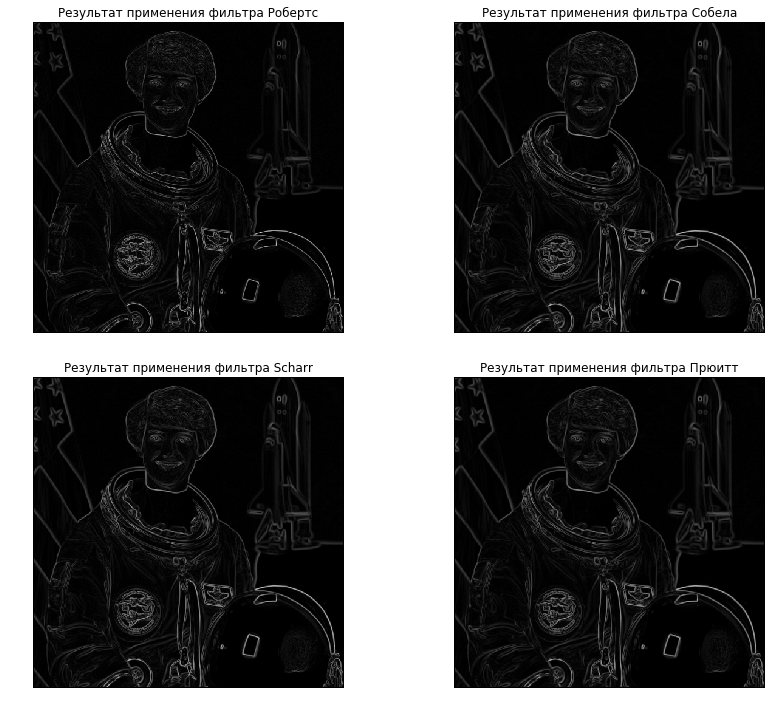

In [173]:
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(2, 2, 1)
plt.axis('off')
imshow(filters.roberts(imgGray))
plt.title('Результат применения фильтра Робертс')

fig.add_subplot(2, 2, 2)
plt.axis('off')
imshow(filters.sobel(imgGray))
plt.title('Результат применения фильтра Собела')

fig.add_subplot(2, 2, 3)
plt.axis('off')
imshow(filters.scharr(imgGray))
plt.title('Результат применения фильтра Scharr')

fig.add_subplot(2, 2, 4)
plt.axis('off')
imshow(filters.prewitt(imgGray))
plt.title('Результат применения фильтра Прюитт')
plt.show()